# Story
A program trying to optimaize a portfolio using mean-variance with objectives of Max Sharpe Ratio, Global Min Volatility, min risk given return, max return given vol.


In [1]:
!pip install pandas_datareader

In [106]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=ef20d661c177d313e592ba395d7bda998b08784b48655792491d1ec2ebf7cc4d
  Stored in directory: /home/jovyan/.cache/pip/wheels/b4/c3/39/9c01ae2b4726f37024bba5592bec868b47a2fab5a786e8979a
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8367 sha256=946e4f2618f52946e9b4f42413e82d8e8d07d8a498ee9c9d072ee9d086d3cb3d
  Stored in directory: /home/jovyan/.cache/pip/wheels/57/6d/a3/a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking


In [107]:
import pandas as pd
import numpy as np
from datetime import datetime
#from pandas_datareader import data as web
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [61]:
# Get the stock tickers
# FANNG

assets = ['BIGC', 'SRAC', 'MAXR', 'FSLY', 'BPF-UN.TO']

In [58]:
# Assign weights to stocks.
weights = np.full((1,len(assets)), 1/len(assets))[0]
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [72]:
# Tnitiate start date.

StartDate = '2020-01-01'

Today = datetime.today().strftime('%Y-%m-%d')
Today

'2021-01-27'

In [113]:
# Create a df to store historical prices.

df = yf.download(assets, period="max")['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [114]:
df = df.dropna()
df

,BIGC,BPF-UN.TO,FSLY,MAXR,SRAC
Date,,,,,
2020-08-05,72.269997,6.780229,108.919998,20.715347,9.97
2020-08-06,93.510002,6.799464,89.639999,25.002317,9.97
2020-08-07,79.000000,6.751377,79.330002,24.722515,9.97
2020-08-10,76.720001,6.886020,78.180000,24.432720,9.97
2020-08-11,72.570000,6.943724,74.959999,24.832436,10.02
...,...,...,...,...,...
2021-01-20,62.720001,10.880000,97.550003,54.820000,24.40
2021-01-21,71.320000,10.770000,104.129997,51.080002,26.26
2021-01-22,71.250000,10.640000,103.279999,50.220001,24.85


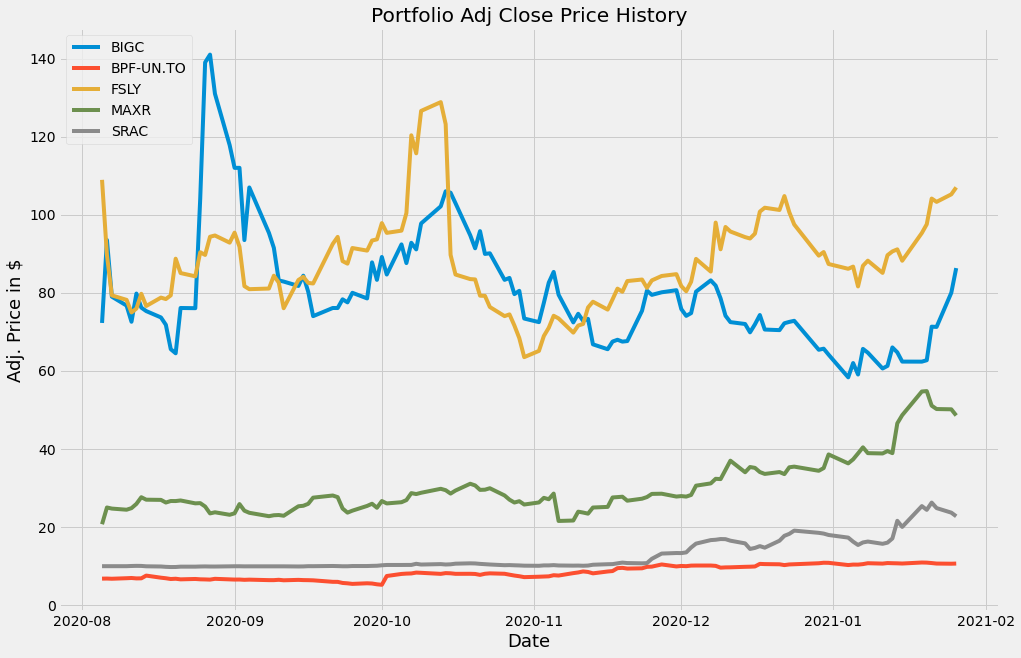

In [115]:
# Visualize the portfolio.
title = 'Portfolio Adj Close Price History'

# Get the stocks
my_stocks = df

plt.figure(figsize=(15,10))
# Plot
for stock in my_stocks.columns.values:
    plt.plot(my_stocks[stock], label = stock)
    

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price in $', fontsize = 18)
plt.legend(my_stocks.columns.values, loc = 'upper left')

plt.show()

In [64]:
# return
returns = df.pct_change()
returns

,BIGC,SRAC,MAXR,FSLY,BPF-UN.TO
Date,,,,,
2020-08-05,NaN,NaN,NaN,NaN,NaN
2020-08-06,0.293898,0.000000,0.206947,-0.177011,0.002837
2020-08-07,-0.155171,0.000000,-0.011191,-0.115016,-0.007072
2020-08-10,-0.028861,0.000000,-0.011722,-0.014496,0.019943
2020-08-11,-0.054093,0.005015,0.016360,-0.041187,0.008380
...,...,...,...,...,...
2021-01-20,0.005773,-0.037855,0.002011,0.023502,-0.002750
2021-01-21,0.137117,0.076230,-0.068223,0.067453,-0.010110
2021-01-22,-0.000981,-0.053694,-0.016836,-0.008163,-0.012071


In [65]:
# Cov Matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,BIGC,SRAC,MAXR,FSLY,BPF-UN.TO
BIGC,1.606174,0.065681,0.174632,0.192122,-0.029945
SRAC,0.065681,0.535979,0.187508,0.104916,0.035564
MAXR,0.174632,0.187508,0.725396,0.095765,0.032421
FSLY,0.192122,0.104916,0.095765,0.797924,-0.010917
BPF-UN.TO,-0.029945,0.035564,0.032421,-0.010917,0.583705


In [66]:
# Portfolio Variance, Volatility, Annual return
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_vol = np.sqrt(port_variance)
port_annual_r = np.sum(returns.mean() * weights) * 252

In [67]:
# show the expected annual return, vol, var
pct_var = round(port_variance, 5) * 100
pct_vol = round(port_vol, 5) * 100
pct_r = round(port_annual_r, 5) * 100
print(f'This Portfolio has an:\nannual return of {pct_r:.2f}%\nvolalitity of {pct_vol:.2f}%\nvariance of {pct_var:.2f}%.')

This Portfolio has an:
annual return of 137.06%
volalitity of 48.76%
variance of 23.78%.


In [37]:
!pip install PyPortfolioOpt

     |████████████████████████████████| 48 kB 2.0 MB/s eta 0:00:011
     |████████████████████████████████| 1.0 MB 6.4 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 11.7 MB 36.4 MB/s eta 0:00:01    |███████████████████████▌        | 8.6 MB 36.4 MB/s eta 0:00:01
Processing /home/jovyan/.cache/pip/wheels/c3/c1/ce/b551b0b3a40c990e1da2ec9aecff62f7c2d43cab8766368e82/ecos-2.0.7.post1-cp38-cp38-linux_x86_64.whl
Processing /home/jovyan/.cache/pip/wheels/64/b7/4b/a5c555c1d94b8a25ac3f9da1bdd19ba9896f558d124de7d7ef/scs-2.1.2-cp38-cp38-linux_x86_64.whl
     |████████████████████████████████| 215 kB 41.3 MB/s eta 0:00:01
     |████████████████████████████████| 921 kB 45.0 MB/s eta 0:00:01     |████████████████                | 460 kB 45.0 MB/s eta 0:00:01
  Created wheel for cvxpy: filename=cvxpy-1.1.7-cp38-cp38-linux_x86_64.whl size=3673719 sha256=67db7e3c823bfc7

In [49]:
from pypfopt import EfficientFrontier, risk_models, expected_returns, plotting

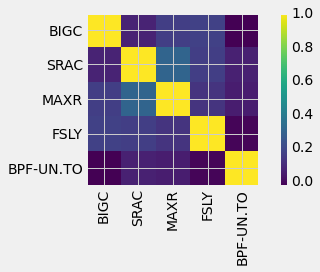

<AxesSubplot:>

In [68]:
plotting.plot_covariance(cov_matrix_annual, plot_correlation=True)

## Strategy: Max Sharpe

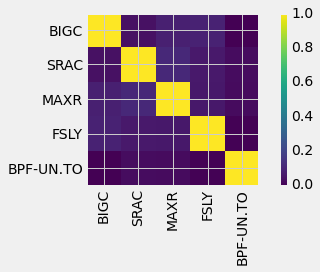

OrderedDict([('BIGC', 0.26865), ('SRAC', 0.1763), ('MAXR', 0.21004), ('FSLY', 0.20254), ('BPF-UN.TO', 0.14247)])
Expected annual return: 269.3%
Annual volatility: 47.1%
Sharpe Ratio: 5.68


(2.6927310542252427, 0.4707181958393852, 5.677985422805307)

In [103]:
# Portfolio Optimization -- Max Sharpe Ratio

# the expected returns and annual sample covariance.
mu = expected_returns.capm_return(df)  # use the CAPM returns, which aims to be slightly more stable than the default mean historical return
S = risk_models.CovarianceShrinkage(df).ledoit_wolf()
plotting.plot_covariance(S, plot_correlation=True);

# Optimize for max Sharpe Ratio
ef = EfficientFrontier(mu, S)
ef.max_sharpe() # strategy---max Sharpe R

cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

/opt/conda/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


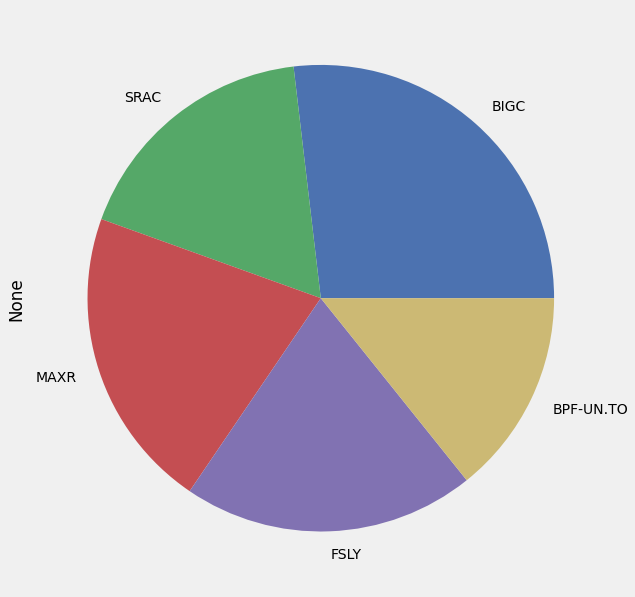

In [104]:
pd.Series(cleaned_weights).plot.pie(figsize=(10,10));

Let's say we were happy with this portfolio and wanted to actually go out and buy the shares. To do this, we would need to construct a discrete allocation (unless broker supports fractional shares!)

If we had $1m to invest and would like our portfolio to be 130/30 long/short, we can construct the actual allocation as follows:

In [95]:
# Get the discrete allocation (# of shares )
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)
da = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=1000000) #,short_ratio=0.1

In [96]:
allocation, leftover = da.lp_portfolio()
print(f"Discrete Allocation: {allocation}")
print(f"Funds remaining: {leftover:.2f}")

Discrete Allocation: {'BIGC': 3112, 'SRAC': 7749, 'MAXR': 4325, 'FSLY': 1893, 'BPF-UN.TO': 13391}
Funds remaining: 4.85


## Plot the frontier

Expected annual return: 268.9%
Annual volatility: 47.0%
Sharpe Ratio: 5.68


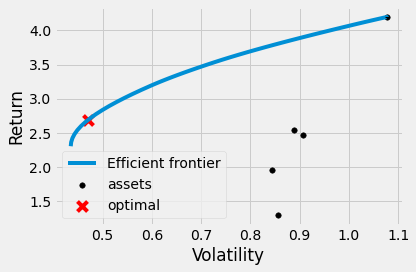

In [139]:
from pypfopt import CLA, plotting

cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);
ax = plotting.plot_efficient_frontier(cla, showfig=False)

## Strategy: GMV

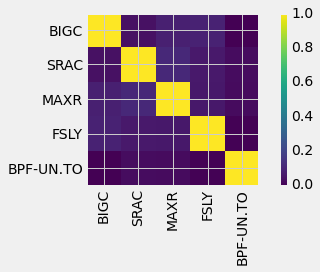

OrderedDict([('BIGC', 0.13497), ('SRAC', 0.22245), ('MAXR', 0.19049), ('FSLY', 0.1976), ('BPF-UN.TO', 0.2545)])
Annual volatility: 43.5%


/opt/conda/lib/python3.8/site-packages/pypfopt/efficient_frontier.py:111: UserWarning: No expected returns provided. You may only use ef.min_volatility()
  warnings.warn(


(None, 0.43515842894780427, None)

In [101]:
# Portfolio Optimization -- GMV

# ledoit_wolf sample covariance and no expected return needed this case.

S = risk_models.CovarianceShrinkage(df).ledoit_wolf()
plotting.plot_covariance(S, plot_correlation=True);


ef = EfficientFrontier(None, S, weight_bounds=(None, None))
ef.min_volatility()  # strategy---GMV

cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

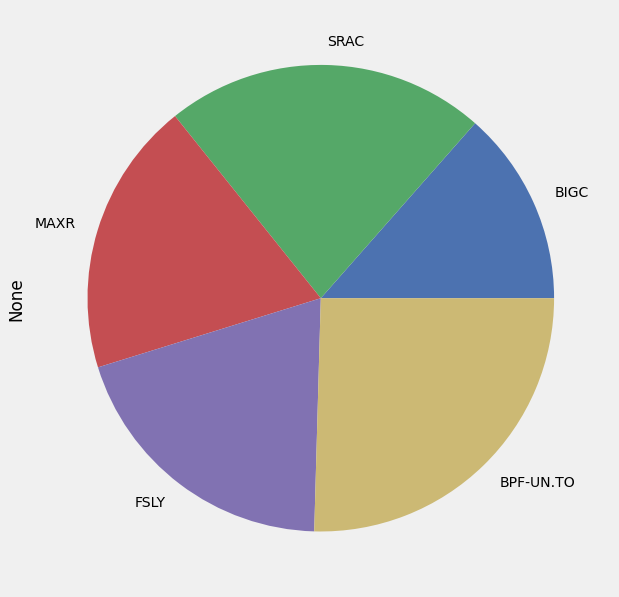

In [102]:
pd.Series(cleaned_weights).plot.pie(figsize=(10,10));

In [100]:
da = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=1000000) # ,short_ratio=0.1
allocation, leftover = da.lp_portfolio()
print(f"Discrete Allocation: {allocation}")
print(f"Funds remaining: {leftover:.2f}")

Discrete Allocation: {'BIGC': 1563, 'SRAC': 9778, 'MAXR': 3922, 'FSLY': 1847, 'BPF-UN.TO': 23920}
Funds remaining: 21.47


## Risk parity, with L2 regularisation

Assume that I can't accept anything more than min volatility. 

In [117]:
# Set constrains on sector holdings
sector_mapper = {ticker:yf.Ticker(ticker).info['sector'] for ticker in assets}
sector_mapper

{'BIGC': 'Technology',
 'SRAC': 'Financial Services',
 'MAXR': 'Technology',
 'FSLY': 'Technology',
 'BPF-UN.TO': 'Consumer Cyclical'}

In [118]:
sector_lower = {
    "Consumer Cyclical": 0.1, # at least 10% to staples
    "Technology": 0.05 # at least 5% to tech
    # For all other sectors, it will be assumed there is no lower bound
}

sector_upper = {
    "Technology": 0.6
}

In [121]:
ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.efficient_risk(target_volatility=0.436)
weights = ef.clean_weights()
weights

OrderedDict([('BIGC', 0.15514),
             ('SRAC', 0.21549),
             ('MAXR', 0.19344),
             ('FSLY', 0.19834),
             ('BPF-UN.TO', 0.2376)])

In [122]:
# check for zero weight components
num_small = len([k for k in weights if weights[k] <= 1e-4])
print(f"{num_small}/{len(ef.tickers)} tickers have zero weight")

0/5 tickers have zero weight


When too many zero-weighted allocation occurs, in effect, the optimiser coule be "overfitting" to the data -- much more likely to get better results by enforcing some level of diversification. One way of doing this is to use L2 regularisation – essentially, adding a penalty on the number of near-zero weights.

Tune the value of gamma to choose the number of nonzero tickers. 
Larger gamma pulls portfolio weights towards an equal allocation

In [123]:
from pypfopt import objective_functions

ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.add_objective(objective_functions.L2_reg, gamma=0.1)  # gamme is the tuning parameter
ef.efficient_risk(0.436)
weights = ef.clean_weights()
weights

OrderedDict([('BIGC', 0.15513),
             ('SRAC', 0.21548),
             ('MAXR', 0.19346),
             ('FSLY', 0.19835),
             ('BPF-UN.TO', 0.23758)])

In [124]:
num_small = len([k for k in weights if weights[k] <= 1e-4])
print(f"{num_small}/{len(ef.tickers)} tickers have zero weight")

0/5 tickers have zero weight


In [129]:
ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.add_objective(objective_functions.L2_reg, gamma=1)  # gamme is the tuning parameter
ef.efficient_risk(0.436)
cleaned_weights = ef.clean_weights()
cleaned_weights

OrderedDict([('BIGC', 0.15505),
             ('SRAC', 0.21547),
             ('MAXR', 0.19359),
             ('FSLY', 0.19841),
             ('BPF-UN.TO', 0.23749)])

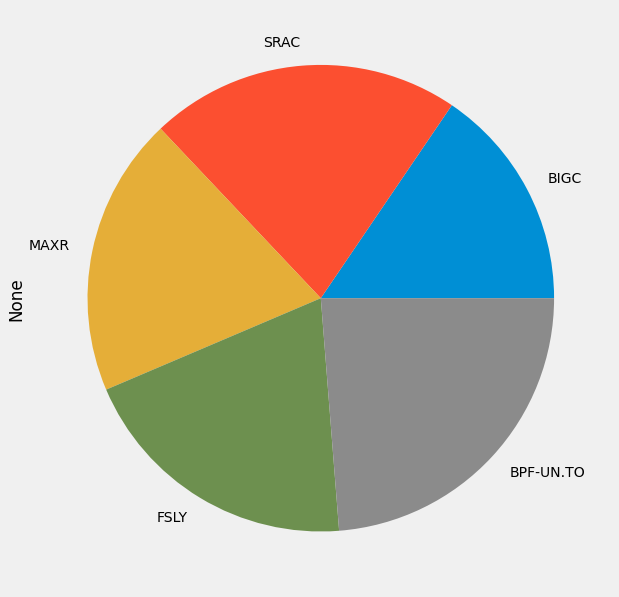

In [130]:
pd.Series(cleaned_weights).plot.pie(figsize=(10, 10));

In [131]:
ef.portfolio_performance(verbose=True);

Expected annual return: 236.3%
Annual volatility: 43.6%
Sharpe Ratio: 5.37


## Minimize risk for a preset return level -- market neutral
suppose objective is defined return level and portfolio to be market neutral (it is equally exposed to the long and short sides)

In [132]:
ef = EfficientFrontier(mu, S, weight_bounds=(None, None)) # set no weight bounds to allow shorts
ef.add_objective(objective_functions.L2_reg)
ef.efficient_return(target_return=0.40, market_neutral=True)
cleaned_weights = ef.clean_weights()
cleaned_weights

OrderedDict([('BIGC', 0.14274),
             ('SRAC', -0.04668),
             ('MAXR', 0.01137),
             ('FSLY', 0.00135),
             ('BPF-UN.TO', -0.10878)])

In [133]:
ef.portfolio_performance(verbose=True);

Expected annual return: 40.0%
Annual volatility: 18.5%
Sharpe Ratio: 2.05


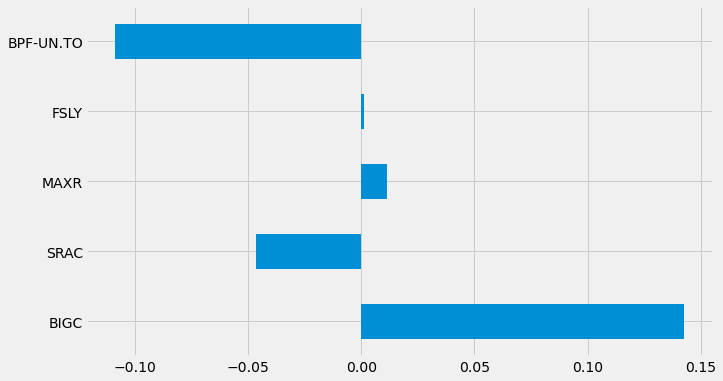

In [134]:
pd.Series(cleaned_weights).plot.barh(figsize=(10,6));

In [136]:
print(f"Net weight: {sum(cleaned_weights.values()):.2f}")

Net weight: 0.00
